In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
def train_and_evaluate_models(X_train, y_train, X_val, y_val,test_x):
    """
    Train and evaluate multiple classification models on the given data.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_val: Validation features
    - y_val: Validation labels

    Returns:
    - A dictionary containing model names as keys and their accuracies on the validation data as values.
    """
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', C=1.0, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    accuracies = {}
    pred={}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_test=model.predict(test_x)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies[model_name] = accuracy
        pred[model_name]=y_pred_test
    print(accuracies)
    return accuracies,pred


In [ ]:
def cross_validation(x_train,y_train,x_valid,y_valid):
    classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ('Logistic Regression',LogisticRegression(max_iter=1000, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("SVM", SVC(kernel="linear"))]


    
    for model_name, model in classifiers:
        cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5)
        print(f"{model_name} Cross-validation scores:", cross_val_scores)
        print(f"{model_name} Mean accuracy:", cross_val_scores.mean())
        print(f"{model_name} Standard deviation:", cross_val_scores.std())
        print("\n")

In [7]:
#function for knn model using and check accuarcy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def knn(train_x,train_y,valid_x,valid_y):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    accuracy = accuracy_score(valid_y, y_pred)
    print(f'Accuracy using knn: {accuracy:.2f}')

In [8]:
#function for data preprocessing
from sklearn.preprocessing import StandardScaler
def preprocessing(label):
    train=pd.read_csv("/kaggle/input/ml-grp-project-train-data-set/train.csv")
    test=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/test.csv")
    valid=pd.read_csv("/kaggle/input/ml-grp-project-test-data-set/valid.csv")
    train_x_label_1=train.iloc[:, :-4]
    train_y_label_1=train.iloc[:,-5+label]

    ss = StandardScaler()
    scaled_train_x_label = ss.fit_transform(train_x_label_1)
    scaled_train_x_label
    scaled_test_x_label=ss.fit_transform(test_x_label_1)
    scaled_valid_x_label=ss.fit_transform(valid_x_label_1)
    return scaled_train_x_label,scaled_valid_x_label
    


In [9]:
# pca approch
from sklearn.decomposition import PCA
def pca(train_x,train_y,valid_x,valid_y,test_x):
    pca=PCA(.95, svd_solver='full')
    pca=pca.fit(train_x)
    train_features_pca=pca.transform(train_x)
    valid_features_pca=pca.transform(valid_x)
    test_features_pca=pca.transform(test_x)
    print("accuarcy after pca")
    #     knn(train_features_pca,train_y,valid_features_pca,valid_y)
    return train_features_pca,valid_features_pca,test_features_pca
    

In [10]:
# Write predicted values to a CSV file.
import pandas as pd

def write_predictions_to_csv(predictions, output_file):

    
    # Create a DataFrame with a column for predictions
    df = pd.DataFrame({'Predicted_Label': predictions})
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)  # Set index=False to exclude row numbers


In [24]:
train=pd.read_csv("/kaggle/input/ml-grp-project-layer-11/train.csv")
test=pd.read_csv("/kaggle/input/ml-grp-project-layer-11/test.csv")
valid=pd.read_csv("/kaggle/input/ml-grp-project-layer-11/valid.csv")

In [25]:
train.head()
test.head()
valid.head()
train.info()
train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 168.0 MB


feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

In [26]:
#Check is there any NaN values
train.isnull().sum()
#check is there any duplicates in the data set
train.drop_duplicates()

#only label_2 has NaN values

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,NaN,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,NaN,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,NaN,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,NaN,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,NaN,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,0.051860,0.076411,0.105938,-0.112908,0.023364,0.059527,-0.079593,-0.073753,-0.107601,0.104177,...,0.044550,-0.056263,0.004664,0.075623,0.017195,0.240886,39,29.0,1,6
28516,0.015274,0.025557,0.071350,-0.041278,-0.010443,0.009135,-0.028207,-0.031185,-0.054272,0.029009,...,0.025501,-0.018314,-0.012793,0.000299,0.012029,0.046191,39,29.0,1,6
28517,-0.000337,0.029920,0.065977,-0.035693,0.018643,-0.000174,-0.051270,-0.022635,-0.041316,0.001559,...,0.038724,-0.011894,0.002687,0.008560,-0.004554,0.061891,39,29.0,1,6
28518,0.035765,0.053481,0.131675,-0.043579,-0.011288,-0.002910,-0.042682,-0.006227,-0.107985,0.055559,...,-0.011463,-0.035990,-0.018325,-0.010334,-0.020396,0.050323,39,29.0,1,6


In [27]:
#cheack is there any string values, if there any string values we can encode the values.
contains_strings=train.applymap(lambda x: isinstance(x, str))
if contains_strings.any().any():
    print("There are string values in the DataFrame columns.")
else:
    print("There are no string values in the DataFrame columns.")

There are no string values in the DataFrame columns.


label 1 

In [28]:
train_x_label_1=train.iloc[:, :-4]
train_y_label_1=train.iloc[:,-4:-3]
valid_x_label_1=valid.iloc[:, :-4]
valid_y_label_1=valid.iloc[:,-4:-3]
test_x_label_1=test.iloc[:, 1:]
train_x_label_1


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085613,0.116276,-0.009873,-0.168441,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.235261,0.075487,0.032231,-0.318012,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.146143,0.113063,0.038823,-0.199746,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.102543,0.101914,0.043303,-0.202432,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.253095,0.131308,0.089454,-0.219729,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,0.051860,0.076411,0.105938,-0.112908,0.023364,0.059527,-0.079593,-0.073753,-0.107601,0.104177,...,-0.134283,0.084795,0.041743,-0.128696,0.044550,-0.056263,0.004664,0.075623,0.017195,0.240886
28516,0.015274,0.025557,0.071350,-0.041278,-0.010443,0.009135,-0.028207,-0.031185,-0.054272,0.029009,...,0.027247,0.021062,0.025761,-0.069785,0.025501,-0.018314,-0.012793,0.000299,0.012029,0.046191
28517,-0.000337,0.029920,0.065977,-0.035693,0.018643,-0.000174,-0.051270,-0.022635,-0.041316,0.001559,...,0.002205,0.030578,0.007359,-0.052741,0.038724,-0.011894,0.002687,0.008560,-0.004554,0.061891
28518,0.035765,0.053481,0.131675,-0.043579,-0.011288,-0.002910,-0.042682,-0.006227,-0.107985,0.055559,...,0.004783,0.056293,0.019945,-0.112201,-0.011463,-0.035990,-0.018325,-0.010334,-0.020396,0.050323


In [29]:
# knn(train_x_label_1,train_y_label_1,valid_x_label_1,valid_y_label_1)
# Accuracy using knn: 0.88
test_x_label_1
    

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,0.077971,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,0.066863,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,0.042701,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,0.104941,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,0.060278,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,-0.028521,0.017629,0.116956,-0.092957,0.027548,0.071823,-0.078945,-0.017882,-0.063286,0.074607,...,-0.101669,0.119924,0.014189,-0.114864,0.030527,-0.036430,0.004364,0.011239,-0.005128,0.141674
740,0.006921,0.031997,0.101940,-0.046349,-0.001958,-0.003312,-0.055653,-0.006035,-0.055854,0.015251,...,0.001517,0.040581,0.020779,-0.054269,0.035295,-0.016866,-0.013290,-0.000578,0.020720,0.037498
741,0.067027,0.029341,0.099419,0.008187,0.012125,0.006544,-0.050957,-0.081037,-0.046458,0.058555,...,-0.048202,0.059836,0.031391,-0.129698,0.011240,-0.039363,-0.005562,0.073112,-0.023642,0.095898
742,0.049263,0.029409,0.094083,-0.052625,0.001279,0.000133,-0.042313,-0.020200,-0.058053,0.035704,...,-0.015722,0.080432,0.029869,-0.075587,0.017989,-0.020131,-0.016471,0.024185,0.024485,0.065564


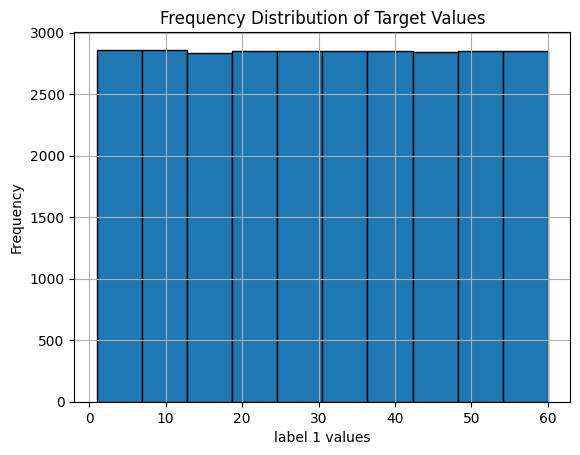

In [30]:
import matplotlib.pyplot as plt
plt.hist(train_y_label_1['label_1'], bins=10, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('label 1 values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Target Values')
plt.grid(True)

# Show the plot
plt.show()

In [31]:
train_and_evaluate_models(train_x_label_1, train_y_label_1, valid_x_label_1,valid_y_label_1,test_x_label_1)
cross_validation(train_x_label_1, train_y_label_1, valid_x_label_1,valid_y_label_1)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.8946666666666667, 'Logistic Regression': 0.844}


({'SVM': 0.8946666666666667, 'Logistic Regression': 0.844},
 {'SVM': array([26, 18, 16,  7, 58, 46,  7, 22, 29, 26, 33,  6, 54, 51, 23, 48, 23,
          2, 43, 42, 11, 35, 39,  7, 21, 48, 28, 55,  2, 51, 55, 46,  1, 56,
         30, 22, 50,  6, 27, 18, 19, 47,  6, 46, 59, 25, 31, 38,  5, 32, 25,
         56, 39, 37, 32, 40, 46, 52, 28, 34, 16, 47, 55, 24, 23, 18, 20,  6,
         36, 38, 22, 28, 44, 46, 55, 59, 49, 55, 57, 12, 52, 38, 23,  4, 31,
         49, 14, 19, 12, 16, 36, 43, 34, 23, 54, 46, 27,  5,  7, 42, 19, 26,
         31, 36, 53, 10, 12, 33, 54,  2, 57, 37, 17, 50, 46, 46, 17, 34, 32,
         40, 39, 40,  8, 22, 38, 15, 39,  9, 52, 37, 28, 13, 10, 55, 28, 25,
         11, 57, 16, 27, 50,  2, 51, 27, 32, 44, 16, 53, 11, 46, 42, 37, 47,
         50,  3, 41,  1, 20, 15,  8,  3, 18,  5, 28, 46, 49, 16, 40, 17, 20,
         53, 57, 27, 16, 11, 35, 34, 52, 41, 20,  7, 18, 21,  7, 37, 55, 29,
         28, 23, 35, 46, 52, 30, 27, 13,  7, 28, 14,  3, 36, 17, 60, 18,  1,
         

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.transform(test_x_label_1)
scaled_valid_x_label_1=ss.transform(valid_x_label_1)
train_and_evaluate_models(scaled_train_x_label_1, train_y_label_1, scaled_valid_x_label_1,valid_y_label_1,scaled_test_x_label_1)
print("""accuracy using standard scaling.{'SVM': 0.9386666666666666, 'Logistic Regression': 0.9626666666666667}""")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.9333333333333333, 'Logistic Regression': 0.9453333333333334}
accuracy using standard scaling.{'SVM': 0.9386666666666666, 'Logistic Regression': 0.9626666666666667}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# accuracy using RobustScaler
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.transform(test_x_label_1)
scaled_valid_x_label_1=ss.transform(valid_x_label_1)
acc,pred=train_and_evaluate_models(scaled_train_x_label_1,train_y_label_1,scaled_valid_x_label_1,valid_y_label_1,scaled_test_x_label_1)
print("accuracy using RobustScaler.")
y_pred_test=pred['SVM']

# {'SVM': 0.932, 'Logistic Regression': 0.9493333333333334}
# accuracy using RobustScaler.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.932, 'Logistic Regression': 0.9493333333333334}
accuracy using RobustScaler.


In [35]:
write_predictions_to_csv(y_pred_test,"svm label 1 layer 11 after scaling.csv")

In [42]:
scaled_train_x_label_1_df = pd.DataFrame(scaled_train_x_label_1,columns = train_x_label_1.columns)
scaled_train_x_label_1_df.describe()
scaled_test_x_label_1_df=pd.DataFrame(scaled_test_x_label_1,columns=test_x_label_1.columns)
scaled_valid_x_label_1_df=pd.DataFrame(scaled_valid_x_label_1,columns=valid_x_label_1.columns)


In [43]:
scaled_train_x_label_1_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,2.852000e+04,28520.000000,28520.000000,28520.000000,2.852000e+04,2.852000e+04,28520.000000,2.852000e+04,2.852000e+04,2.852000e+04,...,28520.000000,28520.000000,28520.000000,2.852000e+04,28520.000000,2.852000e+04,2.852000e+04,28520.000000,28520.000000,28520.000000
mean,3.725095e-01,0.257046,0.303114,-0.269651,-7.208979e-02,-8.716109e-02,0.007280,-7.076547e-02,-3.351652e-01,2.503192e-01,...,-0.266444,0.176267,0.142752,-2.105947e-01,-0.259729,-2.240545e-01,1.104534e-02,0.265849,-0.149215,0.207172
std,1.010051e+00,0.943425,0.900418,0.949106,9.414707e-01,9.805456e-01,0.879041,8.461507e-01,9.163402e-01,9.540928e-01,...,0.818451,0.818486,0.921567,9.475760e-01,0.977994,9.578761e-01,8.886423e-01,0.842283,0.838829,0.857579
min,-2.148195e+00,-2.416427,-2.371908,-5.081134,-5.686737e+00,-6.305589e+00,-5.180492,-7.967478e+00,-4.409057e+00,-2.937979e+00,...,-6.753196,-2.719336,-5.332371,-4.990131e+00,-4.505069,-6.937797e+00,-4.580097e+00,-2.513659,-7.186339,-2.974263
25%,-2.987063e-01,-0.384550,-0.315297,-0.639537,-5.582484e-01,-5.268713e-01,-0.503964,-5.293705e-01,-7.042651e-01,-3.801890e-01,...,-0.670083,-0.401185,-0.435020,-5.779388e-01,-0.631268,-5.959505e-01,-4.867219e-01,-0.342035,-0.573589,-0.373864
50%,-3.581933e-17,0.000000,0.000000,0.000000,-2.954451e-17,1.360674e-17,0.000000,-4.953449e-17,8.983970e-17,1.069701e-16,...,0.000000,0.000000,0.000000,1.086845e-16,0.000000,-1.059706e-16,-1.491964e-17,0.000000,0.000000,0.000000
75%,7.012937e-01,0.615450,0.684703,0.360463,4.417516e-01,4.731287e-01,0.496036,4.706295e-01,2.957349e-01,6.198110e-01,...,0.329917,0.598815,0.564980,4.220612e-01,0.368732,4.040495e-01,5.132781e-01,0.657965,0.426411,0.626136
max,5.155784e+00,5.620816,4.556793,2.374205,7.098836e+00,6.494182e+00,5.500706,3.755508e+00,3.532450e+00,6.374597e+00,...,1.203116,4.888589,7.332864,4.594209e+00,3.993045,2.808865e+00,7.571562e+00,5.721610,3.825506,6.715033


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# model = RandomForestClassifier(n_estimators=100)
# model.fit(scaled_train_x_label_1, train_y_label_1)
# y_pred = model.predict(scaled_valid_x_label_1_df)
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy
# accuracy = accuracy_score(valid_y_label_1, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# Accuracy: 0.88

In [45]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
# Create a SelectKBest instance with a scoring function (e.g., chi-squared)
selector = SelectKBest(score_func=f_classif, k=400)  # Select the top 2 features

# Fit and transform your data to select the best k features
scaled_train_x_label_1_df = selector.fit_transform(scaled_train_x_label_1_df, train_y_label_1)
scaled_valid_x_label_1_df = selector.transform(scaled_valid_x_label_1_df)
scaled_test_x_label_1_df = selector.transform(scaled_test_x_label_1_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
acc,pred=train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1,scaled_test_x_label_1_df)
print("accuracy after k best.")
y_pred_test=pred['SVM']
y_pred_test_log=pred['Logistic Regression']
write_predictions_to_csv(y_pred_test,"svm label 1 layer 11 after k best.csv")
write_predictions_to_csv(y_pred_test_log,"logistic reg label 1 layer 11 after k best .csv")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.916, 'Logistic Regression': 0.9346666666666666}
accuracy after k best.


In [48]:
scaled_train_x_label_1_df_pca,scaled_valid_x_label_1_df_pca,scaled_test_x_label_1_df_pca=pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1,scaled_test_x_label_1_df)
acc,pred=train_and_evaluate_models(scaled_train_x_label_1_df_pca,train_y_label_1,scaled_valid_x_label_1_df_pca,valid_y_label_1,scaled_test_x_label_1_df_pca)
print("accuracy after k best.")
y_pred_test=pred['SVM']
write_predictions_to_csv(y_pred_test,"svm label 1 layer 11 after pca.csv")

y_pred_test_log=pred['Logistic Regression']
write_predictions_to_csv(y_pred_test_log,"logistic reg label 1 layer 11 after pca .csv")

accuarcy after pca


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'SVM': 0.8786666666666667, 'Logistic Regression': 0.864}
accuracy after k best.


In [ ]:
correlated_features = set()
correlation_matrix = scaled_train_x_label_1_df.corr()
# print(correlation_matrix)
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# print(correlated_features)            
scaled_train_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
scaled_valid_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
print(scaled_train_x_label_1_df.describe(),scaled_valid_x_label_1_df.describe())
knn(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)

#accuracy removing features 0.86

In [25]:
train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)
print("Before pca accuaracy")
"""
{'Random Forest': 0.8546666666666667,
'SVM': 0.928,
'Logistic Regression': 0.9453333333333334, 
'K-Nearest Neighbors': 0.8346666666666667, 
'Naive Bayes': 0.5933333333333334, 
'Decision Tree': 0.344}
"""

/tmp/ipykernel_28/3931122333.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._f

{'Random Forest': 0.8546666666666667, 'SVM': 0.928, 'Logistic Regression': 0.9453333333333334, 'K-Nearest Neighbors': 0.8346666666666667, 'Naive Bayes': 0.5933333333333334, 'Decision Tree': 0.344}
Before pca accuaracy


In [26]:
# use pca
pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)

accuarcy after pca


(array([[ 1.45728513e+01, -4.66955716e-01,  6.13996903e+00, ...,
          4.84971597e-01, -2.10473291e-01,  5.67359012e-01],
        [-1.00216755e+00, -6.98842548e+00, -2.53335697e+00, ...,
          1.29515722e+00,  8.42464648e-01, -8.11739823e-01],
        [-2.76749328e+00, -4.14239809e+00, -4.66152028e+00, ...,
         -1.28873052e-02,  2.53003786e-01,  3.88715245e-01],
        ...,
        [-1.16919379e+01, -4.75978521e+00, -2.26909790e+00, ...,
          5.26696420e-02,  2.80201519e-01, -4.92528328e-02],
        [ 1.32970619e+01,  6.97083185e-01,  6.26665192e+00, ...,
          1.10687631e+00,  1.62483488e-01, -5.43398507e-01],
        [-1.11882344e+01, -2.81445499e+00, -7.07977531e-01, ...,
          2.90632014e-01, -6.03085501e-01, -1.75993304e-01]]),
 array([[-0.72627657, -2.77039297, -0.96251525, ..., -0.15051548,
         -0.3422833 ,  0.10619437],
        [ 6.12543356,  0.59108684,  4.22896548, ...,  0.68719666,
          0.55211866,  0.01401368],
        [-5.78455021, -3.

In [27]:
scaled_train_x_label_1_df_pca,scaled_valid_x_label_1_df_pca=pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)


accuarcy after pca


In [28]:
print("after PCA")
train_and_evaluate_models(scaled_train_x_label_1_df_pca,train_y_label_1,scaled_valid_x_label_1_df_pca,valid_y_label_1)


after PCA


/tmp/ipykernel_28/3931122333.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._f

{'Random Forest': 0.7466666666666667, 'SVM': 0.9053333333333333, 'Logistic Regression': 0.9346666666666666, 'K-Nearest Neighbors': 0.8253333333333334, 'Naive Bayes': 0.6893333333333334, 'Decision Tree': 0.24666666666666667}


{'Random Forest': 0.7466666666666667,
 'SVM': 0.9053333333333333,
 'Logistic Regression': 0.9346666666666666,
 'K-Nearest Neighbors': 0.8253333333333334,
 'Naive Bayes': 0.6893333333333334,
 'Decision Tree': 0.24666666666666667}

{'Random Forest': 0.7466666666666667,
 'SVM': 0.9053333333333333,
 'Logistic Regression': 0.9346666666666666,
 'K-Nearest Neighbors': 0.8253333333333334,
 'Naive Bayes': 0.6893333333333334,
 'Decision Tree': 0.24666666666666667}
 after pca results
 

In [29]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(scaled_train_x_label_1_df_pca,train_y_label_1)
y_pred = model.predict(scaled_valid_x_label_1_df_pca)
y_pred

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([31, 45, 10, 45, 45, 45, 45, 45, 45, 45, 45, 46, 45, 45,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5, 31,  5,  5,  5,  5,  5,  5, 60, 36,
       60, 60, 60, 60, 60, 60, 60, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 34, 11, 11, 52, 52, 52, 52, 52, 52, 52, 52, 52,
       52, 52, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 59, 51, 51, 51, 51, 51, 51, 51, 35, 35,
       35, 35, 35, 35, 20, 35, 56, 56, 56, 56, 56, 56, 56, 56, 56, 52, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3, 40, 40, 40, 40, 40, 40, 40, 19,
       40, 40, 40, 40, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 47, 58, 58,
       58, 58, 44, 44, 49, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 23,
       44, 44, 44, 44, 37

In [ ]:
# hyper parameter tuninng
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [1, 10, 100],  # Adjust the range based on your needs
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs'],
#     'max_iter': [100, 200, 300]  # Adjust the range based on your needs
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Perform Grid Search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the Grid Search to your training data
grid_search.fit(scaled_train_x_label_1_df_pca,train_y_label_1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation data
accuracy = best_model.score(scaled_valid_x_label_1_df_pca, valid_y_label_1)
print("Validation Accuracy with Best Model:", accuracy)
y_pred= best_model.predict(scaled_valid_x_label_1_df_pca)
y_pred_test=best_model_predict(scaled_test_x_label_1_df_pca)



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# write to the csv file 
write_predictions_to_csv(y_pred_test, "label_1_layer_11_logistic_regression_predictions_with_hyperameter_tuning.csv")

In [ ]:
y_pred_test